<a href="https://colab.research.google.com/github/inesdarosa/Series_temporales/blob/main/CO2_Serie_Temporal_usando_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving CO2.csv to CO2.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io

In [ ]:
# Datos obtenidos del curso de análisis de datos del MIT. Este código que re-arma la tabla para quedarse con la concentración de CO2 es sacado del jupyter del curso.

cols = [
    "year", "month", "date1", "date2", "co2", "co2_season_adj", "co2_spline_season_adj", "co2_spline", "co2_fill_7", "co2_fill_8"
]
keep_cols = ["co2"]
co2 = (
    pd.read_csv(io.BytesIO(uploaded['CO2.csv']), skiprows=57, header=None, names=cols)
    .drop(columns=[col for col in cols if col not in keep_cols]) # Only keep column 5 and date columns
    .assign(co2=lambda df: df.co2.replace({-99.99: np.nan})) # -99.99 indicates a homogeneity - replace it with null
)
# View DataFrame to check whether correct table has been generated.
co2.head(10)

,co2
0,NaN
1,NaN
2,315.70
3,317.45
4,317.51
5,NaN
6,315.86
7,314.93
8,313.21
9,NaN


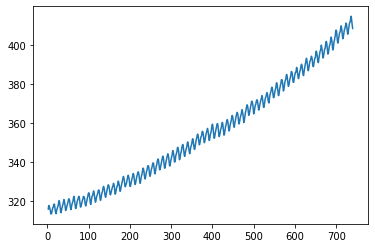

In [ ]:
co2 = co2.dropna() # drop missing values from the dataframe
plt.plot(co2)
plt.show()

A partir de aquí usamos el código usado en el curso de marvik para la predicción de valores bajo el contexto de serie temporal.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

dataset = co2.values
#dataset
dataset = dataset.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [ ]:
dataset

array([[0.02450323],
       [0.04172421],
       [0.04231477],
       [0.02607751],
       [0.01692581],
       [0.        ],
       [0.00118089],
       [0.01436758],
       [0.02332211],
       [0.03217888],
       [0.03385162],
       [0.04438114],
       [0.04999042],
       [0.04861259],
       [0.0327692 ],
       [0.01564646],
       [0.0061996 ],
       [0.00118089],
       [0.01574492],
       [0.02332211],
       [0.03168678],
       [0.03709912],
       [0.04300332],
       [0.0572722 ],
       [0.06721139],
       [0.062783  ],
       [0.04890776],
       [0.02647114],
       [0.0094471 ],
       [0.00610113],
       [0.01761484],
       [0.02932501],
       [0.03621364],
       [0.04418445],
       [0.05245042],
       [0.06170058],
       [0.07252502],
       [0.06455421],
       [0.05274558],
       [0.03522944],
       [0.01751614],
       [0.02066517],
       [0.02843952],
       [0.03739429],
       [0.04654598],
       [0.05254865],
       [0.06366849],
       [0.072

In [ ]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [ ]:
train

array([[0.02450323],
       [0.04172421],
       [0.04231477],
       [0.02607751],
       [0.01692581],
       [0.        ],
       [0.00118089],
       [0.01436758],
       [0.02332211],
       [0.03217888],
       [0.03385162],
       [0.04438114],
       [0.04999042],
       [0.04861259],
       [0.0327692 ],
       [0.01564646],
       [0.0061996 ],
       [0.00118089],
       [0.01574492],
       [0.02332211],
       [0.03168678],
       [0.03709912],
       [0.04300332],
       [0.0572722 ],
       [0.06721139],
       [0.062783  ],
       [0.04890776],
       [0.02647114],
       [0.0094471 ],
       [0.00610113],
       [0.01761484],
       [0.02932501],
       [0.03621364],
       [0.04418445],
       [0.05245042],
       [0.06170058],
       [0.07252502],
       [0.06455421],
       [0.05274558],
       [0.03522944],
       [0.01751614],
       [0.02066517],
       [0.02843952],
       [0.03739429],
       [0.04654598],
       [0.05254865],
       [0.06366849],
       [0.072

In [ ]:
# Esta función es para transformar la columna de datos a una serie temporal, datos escalados-normalizados, considerando el valor CO2 del tiempo anterior como predictor 
# del valor de CO2 en el tiempo siguiente

def create_dataset(dataset):
    dataX, dataY = [], []
    for i in range(len(dataset)-2):
        dataX.append([dataset[i, 0]])
        dataY.append(dataset[i + 1, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
trainX, trainY = create_dataset(train)
testX, testY = create_dataset(test)

In [ ]:
trainX.shape

(489, 1)

In [ ]:
trainY.shape

(489,)

In [ ]:
# Agrego una dimensión para que los datos tengan la forma necesaria para más adelante
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
# a través de redes neuronales y el uso de LSTM predecimos los valores en el contexto de serie temporal.

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

model = Sequential()
model.add(LSTM(4, input_shape=(1, 1), activation=None))
#model.add(LSTM(4, input_shape=(1, 1)))
model.add(Dense(1))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 4)                 96        
                                                                 
 dense_4 (Dense)             (None, 1)                 5         
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
489/489 - 1s - loss: 0.0350 - 1s/epoch - 3ms/step
Epoch 2/100
489/489 - 1s - loss: 0.0148 - 629ms/epoch - 1ms/step
Epoch 3/100
489/489 - 1s - loss: 0.0073 - 631ms/epoch - 1ms/step
Epoch 4/100
489/489 - 1s - loss: 0.0021 - 587ms/epoch - 1ms/step
Epoch 5/100
489/489 - 1s - loss: 4.4169e-04 - 603ms/epoch - 1ms/step
Epoch 6/100
489/489 - 1s - loss: 2.4678e-04 - 617ms/epoch - 1ms/step
Epoch 7/100
489/489 - 1s - loss: 2.3603e-04 - 630ms/epoch - 1ms/step
Epoch 8/100
489/489 - 1s - loss: 2.3900e-04 - 658ms/epoch - 1ms/step
Epoch 9/100
489/489 - 1s - loss: 2.3712e-04 - 607ms/epoch - 1ms/step
Epoch 10/100
489/489 - 1s - loss: 2.2775e-04 - 621ms/epoch - 1ms/step
Epoch 11/100
489/489 - 1s - loss: 2.2420e-04 - 622ms/epoch - 1ms/step
Epoch 12/100
489/489 - 1s - loss: 2.2412e-04 - 604ms/epoch - 1ms/step
Epoch 13/100
489/489 - 1s - loss: 2.2040e-04 - 603ms/epoch - 1ms/step
Epoch 14/100
489/489 - 1s - loss: 2.2338e-04 - 602ms/epoch - 1ms/step
Epoch 15/100
489/489 - 1s - loss: 2.1060e-04 - 6

In [ ]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [ ]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [ ]:
from sklearn.metrics import mean_squared_error
import math

trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test: %.2f RMSE' % (testScore))

Train: 1.22 RMSE
Test: 1.36 RMSE


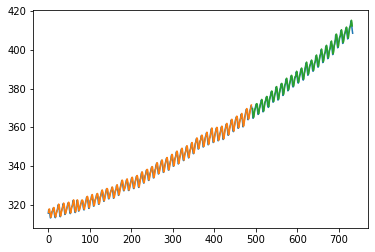

In [ ]:
# Preparo las predicciones sobre los datos de training para graficar
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[1:len(trainPredict)+1, :] = trainPredict

# Preparo las predicciones sobre los datos de test para graficar
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(2)+1:len(dataset)-1, :] = testPredict

# Grafico
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
# Convertir un array de valores en una matriz
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
look_back = 15
trainX, trainY = create_dataset(train,look_back)
testX, testY = create_dataset(test,look_back)

In [ ]:
# Agrego una dimensión para que los datos tengan la forma necesaria para más adelante
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
### SOLUCIÓN
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

model = Sequential()
#model.add(LSTM(4, input_shape=(1, look_back)))
model.add(LSTM(4, input_shape=(1, look_back), activation=None))
model.add(Dense(1))

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 4)                 320       
                                                                 
 dense_7 (Dense)             (None, 1)                 5         
                                                                 
Total params: 325
Trainable params: 325
Non-trainable params: 0
_________________________________________________________________


In [ ]:
### SOLUCIÓN
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
475/475 - 1s - loss: 0.0108 - 1s/epoch - 3ms/step
Epoch 2/100
475/475 - 1s - loss: 6.7991e-04 - 588ms/epoch - 1ms/step
Epoch 3/100
475/475 - 1s - loss: 5.7905e-04 - 583ms/epoch - 1ms/step
Epoch 4/100
475/475 - 1s - loss: 4.6725e-04 - 581ms/epoch - 1ms/step
Epoch 5/100
475/475 - 1s - loss: 4.0781e-04 - 562ms/epoch - 1ms/step
Epoch 6/100
475/475 - 1s - loss: 3.5255e-04 - 578ms/epoch - 1ms/step
Epoch 7/100
475/475 - 1s - loss: 2.3305e-04 - 588ms/epoch - 1ms/step
Epoch 8/100
475/475 - 1s - loss: 1.8595e-04 - 603ms/epoch - 1ms/step
Epoch 9/100
475/475 - 1s - loss: 1.4281e-04 - 559ms/epoch - 1ms/step
Epoch 10/100
475/475 - 1s - loss: 1.2738e-04 - 584ms/epoch - 1ms/step
Epoch 11/100
475/475 - 1s - loss: 1.0858e-04 - 574ms/epoch - 1ms/step
Epoch 12/100
475/475 - 1s - loss: 8.7049e-05 - 574ms/epoch - 1ms/step
Epoch 13/100
475/475 - 1s - loss: 9.6562e-05 - 587ms/epoch - 1ms/step
Epoch 14/100
475/475 - 1s - loss: 1.1548e-04 - 567ms/epoch - 1ms/step
Epoch 15/100
475/475 - 1s - loss: 8.

In [ ]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [ ]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [ ]:
from sklearn.metrics import mean_squared_error
import math

trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test: %.2f RMSE' % (testScore))

Train: 0.73 RMSE
Test: 2.51 RMSE


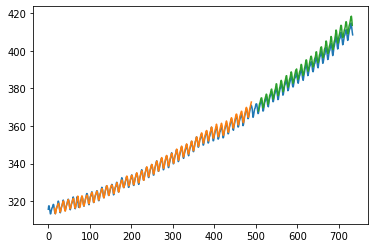

In [ ]:
# Preparo las predicciones sobre los datos de training para graficar
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# Preparo las predicciones sobre los datos de test para graficar
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# Grafico
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()